In [50]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import random

In [51]:
train_dir="./ml-100k/u1.base"
test_dir="./ml-100k/u1.test"

In [52]:
def readData(dir):
    data=[]
    with open(dir,"r") as file:
        for line in file:
            x=line
            tuple=[int(x.split()[0]),int(x.split()[1]),int(x.split()[2])]
            data.append(tuple)            
        return data
    

def getMatrix(data,user_num,item_num):
    R=np.zeros((user_num,item_num))
    for tuple in data:
        R[tuple[0]-1][tuple[1]-1]=tuple[2]
    return R
        

In [53]:
train_data=readData(train_dir)
test_data=readData(test_dir)

In [159]:
usr_num=np.max(train_data,0)[0]
item_num=np.max(train_data,0)[1]
R=getMatrix(train_data,usr_num,item_num)
R_test=getMatrix(test_data,usr_num,item_num)

In [146]:
def loss(R,P,Q):   
    usr_num=R.shape[0]
    item_num=R.shape[1]
    e=0
    x=(R>0)  #大于0的代表初始矩阵已经存在的评分
    loss=np.multiply(np.square(R-np.dot(P,Q)),x) 
    loss=np.sum(loss)
    total=np.sum(x)
    return loss


#lamda：正则项
def matrix_factorization(R,K,step,lamda,validation_data):
    usr_num=R.shape[0]
    item_num=R.shape[1]
    P=np.random.rand(usr_num,K)
    Q=np.random.rand(K,item_num)
    validation_loss=[]
    last_loss=0
    for s in range(step):
        for i in range(usr_num):
            tmp=Q                 
            inv=np.linalg.inv(np.dot(tmp,np.transpose(tmp))+lamda*np.eye(K))
            mul=np.dot(np.transpose(tmp),inv)
            P[i,:]=np.dot(R[i,:],mul)
        for j in range(item_num):
            tmp=P
            inv=np.linalg.inv(np.dot(np.transpose(tmp),tmp)+lamda*np.eye(K))
            mul=np.dot(inv,np.transpose(tmp))
            Q[:,j]=np.dot(mul,R[:,j])                                           
        loss_val=loss(validation_data,P,Q) #np.sum(np.square(Q))*lamda/2+np.sum(np.square(P))*lamda/2
        if(abs(loss_val-last_loss)<0.0000001):
            #return P,Q,validation_loss
        last_loss=loss_val
        validation_loss.append(loss_val)
        #print(loss_val)
    return P,Q,validation_loss




            
        

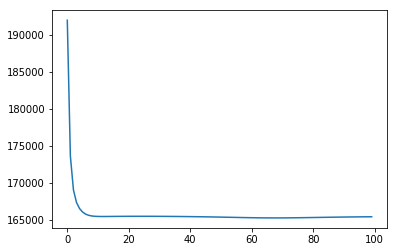

In [178]:
#以下的R是测试用的
'''
R = [
     [5,3,0,1],
     [4,0,0,1],
     [1,1,0,5],
     [1,0,0,4],
     [0,1,5,4],
    ]
R=np.array(R)
R_test=R
'''



K=10
lamda=0.001
step=100

P,Q,validation_loss=matrix_factorization(R,K,step,lamda,R_test)

plt.figure()
iter=range(len(validation_loss))
plt.plot(iter,validation_loss)
plt.show()
#print(np.dot(P,Q))
#error(R,P,Q)


In [168]:
def matrix_factorization_stochastic(R,alpha,K,step,lamda,validation_data):
    usr_num=R.shape[0]
    item_num=R.shape[1]
    P=np.random.rand(usr_num,K)  #初始化
    Q=np.random.rand(K,item_num) #初始化
    validation_loss=[]
    last_loss=0
    for i in range(step):
        sample=0
        user=0
        item=0
        while(sample==0):   #找到一个不等于0的
            user=random.randint(0,usr_num-1)
            item=random.randint(0,item_num-1)
            sample=R[user,item]
        e=R[user,item]-np.dot(P[user,:],Q[:,item])
        P[user,:]=P[user,:]+2*alpha*e*np.transpose(Q[:,item])-alpha*lamda*P[user,:]
        Q[:,item]=Q[:,item]+2*alpha*e*np.transpose(P[user,:])-alpha*lamda*Q[:,item]
        '''
        for k in range(K):                  #正常做法       
            P[i,k]=P[i,k]+2*alpha*e*Q[k,j]-alpha*lamda*P[i,k]  
            Q[k,j]=Q[k,j]+2*alpha*e*P[i,k]-alpha*lamda*Q[k,j]
         ''' 
        loss_val=loss(validation_data,P,Q)+np.sum(np.square(Q))*lamda/2+np.sum(np.square(P))*lamda/2
        validation_loss.append(loss_val)
        if(abs(loss_val-last_loss)<0.0000001):
            return P,Q,validation_loss
        last_loss=loss_val
        print(loss_val)
    return P,Q,validation_loss

In [169]:
'''
R = [
     [5,3,0,1],
     [4,0,0,1],
     [1,1,0,5],
     [1,0,0,4],
     [0,1,5,4],
    ]
R=np.array(R)
R_test=R
'''
alpha=0.01
K=2
lamda=0.02
step=10000

P,Q,validation_loss=matrix_factorization_stochastic(R,alpha,K,step,lamda,R_test)
print(np.dot(P,Q))

213477.093873
213457.621746
213454.400945
213443.950928
213440.844942
213433.610627
213431.670836
213427.296148
213410.449843
213397.667192
213396.356415
213389.872581
213374.328902
213335.359864
213331.61363
213310.259801
213309.639843
213303.283982
213302.449916
213292.059656
213291.952328
213281.590822
213277.939752
213265.903848
213253.135021
213244.521517
213230.787107
213207.047773
213203.792051
213177.96724
213134.608765
213131.079583
213127.769201
213126.812246
213118.28282
213096.010933
213095.771917
213049.33612
213031.459244
213030.201441
213019.665939
213017.231351
213010.236241
212996.050759
212995.304126
212984.495235
212964.529483
212962.358217
212961.903389
212948.580129
212942.229878
212942.230613
212936.482723
212928.363568
212925.013141
212893.520837
212885.267383
212884.237235
212882.078113
212803.103362
212799.794507
212791.659222
212785.794921
212776.847279
212769.267671
212768.807729
212760.336793
212749.206224
212747.454139
212739.996518
212734.224879
212733.604

206035.029633
206016.859735
206016.16254
206012.595642
206009.662411
205979.68043
205976.670702
205939.526627
205936.456506
205907.026917
205905.565152
205876.795104
205875.87906
205870.539084
205857.56955
205830.506543
205828.875273
205817.605572
205814.644041
205791.995939
205789.808532
205733.919315
205728.856474
205718.125921
205710.969482
205710.03308
205709.959284
205707.258132
205685.308448
205676.168358
205665.160718
205664.750429
205650.138859
205649.078204
205644.590729
205644.285105
205641.366791
205639.90322
205601.941554
205583.602639
205577.16141
205568.327404
205567.814238
205558.995891
205553.874232
205518.611153
205508.344712
205497.380459
205494.026692
205486.65701
205483.991652
205477.88453
205474.617828
205430.075911
205429.49822
205422.807435
205414.688301
205412.966291
205406.316642
205390.411038
205355.318779
205317.287877
205298.375224
205283.628194
205283.416807
205278.160213
205278.2391
205273.782727
205273.758041
205263.139295
205250.23353
205207.825659
20519

198334.954262
198327.983413
198317.734085
198303.944901
198292.719616
198274.049794
198270.705833
198269.972568
198269.95704
198234.353847
198184.55751
198176.105803
198168.62104
198163.238693
198148.42199
198143.332677
198126.81118
198119.878146
198118.161374
198092.320603
198090.033886
198082.034252
198073.525624
198070.137777
198062.144882
198054.633036
198053.098335
198019.90826
198014.789261
198012.649802
198010.703534
197996.6052
197996.05527
197995.747247
197974.945267
197971.558047
197962.502358
197952.724659
197952.725502
197950.456723
197946.58577
197946.58629
197924.861938
197916.380977
197912.744694
197904.340784
197897.34782
197896.916046
197894.05126
197893.41622
197818.533887
197796.58229
197794.583368
197779.73708
197776.008356
197768.519811
197760.204109
197750.947209
197735.922012
197735.958228
197729.223168
197728.901139
197726.049294
197723.348388
197701.275191
197700.831007
197698.859369
197698.137869
197694.729731
197667.553048
197661.494101
197643.673274
197607.7

190196.436047
190173.168672
190169.595065
190144.851703
190143.665916
190126.993463
190115.642039
190078.480253
190069.527308
190066.189356
190040.792669
190011.56493
190002.764731
190001.613893
189994.819727
189974.833183
189928.484653
189916.022503
189904.86805
189895.217091
189842.862991
189806.031298
189793.27537
189781.652183
189775.516274
189763.837135
189763.530033
189753.794862
189679.768222
189678.929392
189678.469786
189672.699142
189657.83606
189630.648746
189625.908494
189608.927267
189597.719922
189596.659695
189586.128436
189577.410966
189569.512908
189557.965465
189537.005515
189508.006197
189507.236972
189491.618983
189490.859763
189483.556012
189473.527115
189466.872914
189465.928832
189464.169299
189435.469889
189429.236331
189395.523685
189386.58594
189383.587231
189377.827594
189366.563419
189355.728315
189351.855977
189340.134909
189333.414146
189339.362001
189338.445748
189336.894577
189328.375769
189324.512183
189310.483947
189309.120819
189297.443689
189294.9808

182551.030943
182517.817652
182508.151503
182499.729352
182446.471761
182388.685622
182361.238305
182337.926651
182328.152234
182323.491925
182248.417946
182241.401653
182189.929545
182173.986752
182171.637585
182171.511949
182169.067721
182166.079592
182160.77487
182147.75358
182146.933131
182145.419431
182142.746465
182131.346107
182131.277753
182127.140017
182100.965831
182080.066526
182078.419581
182063.640825
182043.073982
182021.668108
182004.953272
181982.882579
181956.068085
181946.30133
181938.137898
181935.294254
181914.84548
181894.871139
181887.524914
181879.57718
181857.45436
181850.340152
181825.234301
181824.785163
181797.851162
181779.523071
181764.65859
181735.527361
181731.44005
181718.613097
181713.507977
181690.115603
181687.267573
181678.467469
181658.557485
181643.753195
181640.728133
181639.725032
181632.49251
181629.147996
181625.897393
181596.866968
181586.481908
181570.686763
181569.320542
181567.444717
181523.884835
181509.540761
181507.67343
181476.94754
181

173671.286937
173659.155891
173623.442855
173606.860211
173596.327347
173520.393482
173513.489069
173504.759959
173502.521534
173502.10081
173495.87201
173493.493786
173486.801293
173476.52773
173475.326567
173473.40608
173416.679818
173400.47915
173385.009009
173373.589549
173367.328612
173348.305723
173306.537178
173300.271127
173251.877624
173237.138676
173232.737182
173232.716403
173225.280319
173216.302768
173206.459252
173205.541751
173196.81319
173157.704875
173142.048015
173138.245946
173137.370708
173135.880494
173122.348395
173110.955226
173069.320666
173040.983868
173016.564912
172994.881434
172979.757143
172976.388124
172942.746462
172941.176139
172940.978158
172931.815227
172827.727663
172809.934756
172795.39426
172746.615868
172727.521685
172719.224874
172712.973687
172712.544801
172698.584682
172684.008134
172628.87382
172625.833822
172610.196647
172588.064904
172565.402396
172557.333259
172446.790195
172444.371522
172427.969336
172424.643112
172410.792637
172409.175914


164706.681897
164706.144881
164706.182677
164686.577084
164684.925522
164683.251898
164668.362573
164625.041057
164623.40233
164616.865846
164607.643234
164585.521813
164586.821809
164540.175085
164524.06238
164515.68923
164471.554661
164471.48327
164436.663549
164433.628026
164428.314403
164388.962448
164387.719314
164369.819546
164365.940507
164359.840131
164343.548806
164312.707177
164312.687901
164305.040732
164301.40848
164283.694824
164269.95529
164264.993078
164257.909152
164230.161757
164221.914851
164134.109578
164130.253916
164127.429447
164120.329377
164117.244879
164094.857641
164091.42966
164088.312524
164083.065997
164036.51577
164021.013874
164010.921921
164005.174726
163997.86045
163985.866415
163977.562365
163972.694288
163965.46891
163959.378043
163934.101184
163904.734122
163865.428897
163864.411391
163847.177191
163846.377822
163841.09779
163817.177451
163815.336892
163814.681956
163792.060288
163743.874379
163707.546283
163704.542205
163688.672613
163675.8088
16365

156019.927606
155999.552057
155980.978237
155953.086141
155927.961606
155926.820992
155916.178673
155898.061132
155867.822391
155863.747076
155846.671736
155836.945483
155834.571746
155826.706747
155825.353425
155816.915795
155815.013152
155807.415568
155806.74081
155784.398796
155777.543835
155753.586013
155751.491075
155745.784121
155736.811069
155732.785552
155725.54958
155725.276012
155691.161233
155663.747944
155637.470919
155613.658104
155608.807374
155592.048604
155589.574775
155452.737473
155451.808656
155436.468768
155425.968177
155424.44359
155406.945512
155380.044749
155358.833799
155328.225415
155315.866689
155293.251365
155238.877747
155239.528139
155237.272228
155207.836458
155183.512174
155150.18929
155149.299217
155139.815061
155133.993148
155120.595989
155118.748969
155094.935561
155068.582592
155046.706673
155045.567298
155038.451726
155027.379336
155012.074441
154978.081199
154977.992882
154973.766311
154965.278082
154964.676919
154893.682148
154864.515648
154857.671

146802.65147
146779.57045
146766.706538
146761.692063
146764.745751
146758.302849
146753.270712
146751.633688
146733.380288
146726.510172
146723.823803
146718.060859
146699.133514
146701.863474
146690.710282
146680.689117
146639.919571
146622.821536
146613.826287
146610.228385
146607.512612
146595.043281
146594.687023
146484.437297
146482.933746
146442.336493
146421.742677
146414.812061
146399.190011
146395.796527
146393.659605
146378.496844
146362.380383
146354.805853
146333.669759
146290.927032
146275.177086
146262.14051
146247.803957
146245.065641
146220.046976
146216.798153
146213.07249
146211.882337
146208.58649
146201.337605
146192.033662
146165.791756
146133.841009
146130.512715
146115.486138
146083.297194
146072.01609
146070.791143
146059.696687
146049.507824
146047.875816
146044.837542
146043.183758
146037.0405
146034.926522
146026.571732
146024.350565
145992.69992
145977.960152
145962.348775
145941.085115
145931.950445
145920.127303
145908.719759
145907.772543
145896.517214
1

138154.65933
138131.341093
138111.000474
138106.194652
138103.634278
138080.905128
138062.369635
138061.605885
138048.988884
138038.425264
138023.41016
138012.252221
138007.290607
137946.697541
137946.476175
137934.203925
137925.922589
137871.817183
137862.968453
137840.411811
137836.549651
137829.767649
137829.286436
137800.405845
137799.081444
137798.183577
137725.988577
137713.420975
137709.200878
137681.454662
137674.347657
137618.099205
137605.583941
137602.173325
137599.255287
137581.018406
137569.343624
137567.937911
137568.400404
137570.692965
137550.075801
137547.163714
137546.467133
137491.940625
137489.440637
137488.770744
137488.219164
137485.185633
137485.316026
137485.026196
137445.4467
137432.920909
137427.631682
137421.13316
137408.68425
137406.419843
137399.811075
137392.752771
137388.968969
137383.846355
137369.283063
137312.971722
137305.115725
137261.21368
137222.893688
137222.650357
137219.470219
137181.935438
137153.514005
137151.927875
137109.131147
137108.762328

129549.366325
129549.352352
129529.3531
129527.992626
129527.714116
129507.743326
129495.230094
129490.223884
129478.15526
129473.321732
129472.831165
129437.67145
129435.184259
129421.010924
129408.58552
129390.879863
129381.68117
129373.940447
129344.615971
129337.560195
129337.92584
129318.309143
129315.092786
129293.495147
129257.110275
129236.485708
129227.162948
129223.645864
129201.60273
129141.447674
129137.868375
129135.388987
129085.981604
129057.041394
129036.524548
129007.687584
129000.776392
128989.137201
128980.589566
128980.164415
128933.49419
128923.919389
128908.342202
128906.499158
128906.698268
128906.485082
128861.956305
128857.670913
128856.990379
128853.534408
128849.058477
128842.808027
128812.45599
128771.966324
128769.481805
128766.747938
128691.114852
128657.374349
128644.706504
128649.872225
128646.034479
128621.227855
128600.965091
128587.291757
128578.530968
128561.300263
128540.863435
128541.031403
128527.065344
128505.658977
128504.247889
128502.374783
12

121862.897606
121853.891282
121844.309584
121841.587127
121838.017905
121828.672814
121817.61965
121809.094586
121798.054823
121798.033311
121797.639377
121799.809377
121793.978603
121795.787318
121749.00427
121745.297792
121740.965193
121723.054793
121705.524897
121680.187755
121656.249922
121646.065091
121630.305377
121629.09679
121626.343014
121622.396021
121621.9463
121617.620197
121522.020179
121514.211665
121510.761006
121504.148863
121494.715622
121448.293529
121445.20181
121442.101466
121397.32529
121391.731929
121375.202994
121303.79076
121296.879401
121260.28037
121264.82354
121248.858492
121242.431987
121240.9134
121226.768946
121206.737089
121205.993062
121201.878305
121201.76871
121198.655254
121194.553984
121189.24256
121171.051414
121167.833496
121151.416714
121137.550857
121130.83392
121145.235821
121133.950089
121128.755377
121100.192959
121090.345381
121077.344382
121038.817204
121022.670289
121020.067849
121018.142292
121016.403491
121008.609164
120960.289054
120955.

113883.504719
113857.097701
113848.755012
113843.239172
113840.382695
113840.275944
113837.675012
113795.922112
113778.015081
113776.878584
113775.208129
113745.193675
113728.367579
113720.546107
113716.388935
113711.396372
113696.385179
113680.325921
113683.769488
113649.90831
113634.158909
113591.473566
113579.247724
113568.378157
113551.950901
113552.810746
113530.186825
113519.209471
113505.561738
113485.257241
113481.129941
113452.499716
113455.909593
113453.966306
113450.236447
113436.672608
113434.30656
113421.962717
113410.119975
113406.747507
113405.034268
113403.975941
113387.379593
113385.301103
113355.513899
113305.145033
113300.405563
113299.52563
113282.181958
113238.200412
113223.880538
113188.565312
113171.673472
113169.122505
113145.536575
113138.311998
113127.503254
113106.678401
113092.971099
113081.996694
113080.759956
113106.478068
113104.513579
113089.409471
113089.093187
113088.038845
113088.847041
113088.20776
113066.972942
113064.738768
112978.23579
112975.5616

106483.626722
106481.133698
106468.539724
106466.223473
106463.449895
106461.596498
106449.545659
106427.487891
106420.952905
106420.407184
106404.090296
106406.386301
106397.535145
106396.542602
106390.175343
106369.357777
106379.472334
106365.250423
106364.77586
106359.039666
106310.271535
106305.719316
106304.358523
106299.094326
106296.17181
106284.837259
106261.326104
106255.243739
106250.196108
106240.888093
106179.07495
106172.676871
106170.994608
106159.121031
106155.777593
106127.806351
106112.058604
106112.016965
106109.200878
106075.125885
106062.630925
106062.375481
106076.482133
106072.496558
106032.048517
106016.903611
106004.893471
106004.87281
105985.491021
105961.937844
105950.597941
105938.553477
105927.014905
105926.147935
105924.226161
105922.91246
105920.514814
105904.486285
105878.619375
105876.962444
105875.324643
105867.440746
105867.410606
105852.4258
105844.452693
105846.191794
105845.65143
105828.094081
105799.706702
105793.742952
105792.412997
105766.874113


100232.629052
100219.990924
100188.011558
100172.734166
100171.644127
100155.077197
100154.530717
100151.403232
100137.449375
100129.732728
100125.883963
100121.768991
100084.956098
100077.306909
100092.355848
100087.403496
100088.654865
100079.75565
100072.581534
100072.347378
100063.632272
100053.49754
100051.921441
100041.63546
100040.680798
100028.449744
99999.3665563
99993.9821006
99983.0626851
99974.045356
99969.5905032
99966.8711868
99923.7338891
99906.4031723
99893.3231596
99889.6704391
99837.8801209
99830.0888288
99813.7881006
99802.4343143
99801.2884524
99787.4757028
99754.7118917
99737.204368
99718.0684803
99717.4781752
99702.043373
99700.9533622
99699.8065249
99686.9648172
99651.1112746
99628.571926
99622.29837
99613.973772
99608.44983
99609.0026066
99553.5974428
99540.5379698
99534.8085232
99527.6150444
99524.0418538
99519.3235042
99513.9284628
99511.5497507
99500.9430746
99498.5808004
99486.2839131
99478.2650294
99474.4012165
99421.5650062
99419.6562937
99410.3348472
9937

94106.9938169
94101.3689001
94098.5696031
94097.0377858
94091.2115835
94053.6129747
94021.8165636
94019.7631719
94011.7423701
94008.0662155
94002.6464932
94001.8944117
94000.5305057
93991.8584845
93990.5577537
93975.4913771
93978.9694902
93981.9389585
93980.2395647
93977.2746364
93966.2910128
93979.3915763
93973.9821157
93974.9895051
93972.4281038
93969.7839357
93960.3024133
93937.7211363
93926.6534758
93897.7335753
93905.6449929
93904.1103736
93899.8419508
93893.6812073
93876.0392238
93886.0009431
93857.2405989
93849.3470723
93843.1526887
93815.8417001
93810.5497008
93808.6773497
93758.572914
93749.4208747
93745.5742597
93698.3274323
93669.7208749
93670.0516589
93660.3917205
93662.6651513
93659.38054
93651.145357
93645.5585141
93640.2457174
93632.334686
93631.5455088
93626.8407323
93615.805037
93613.5217494
93607.5958917
93595.9681459
93580.3788087
93573.5501878
93572.5078952
93554.3497051
93551.4687312
93542.1712949
93527.0223632
93517.9838074
93509.9265798
93493.5614073
93489.232944

88856.7235681
88846.3063081
88836.3670355
88811.163999
88809.4440521
88802.9868176
88779.6136098
88755.5850251
88752.475223
88725.6747484
88736.0916578
88726.678723
88712.289399
88708.2329375
88706.4653646
88705.9713648
88701.7162532
88684.4274404
88674.1217306
88663.4824575
88647.887836
88641.2648089
88635.7296155
88629.934529
88622.1567727
88615.205306
88613.7795142
88592.9322457
88581.8641164
88580.7830072
88574.3355953
88531.3768667
88539.403506
88560.0311551
88558.6948531
88553.202571
88543.3674715
88542.4450774
88542.3572541
88538.3559083
88534.637805
88534.3037215
88532.0760449
88531.5790438
88520.7622032
88526.4633061
88520.5514303
88518.8403298
88515.6650337
88509.1054889
88505.2223178
88513.5356932
88513.0626101
88510.0645091
88510.0759548
88502.8511823
88503.6015067
88484.5131731
88482.1115558
88478.2142541
88472.6419333
88470.0456818
88469.2019806
88466.6833364
88462.4499687
88460.7074891
88450.8648643
88442.1513086
88442.681755
88441.3477779
88432.222456
88420.8599732
8841

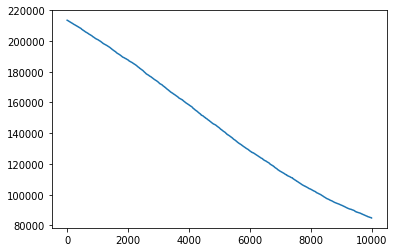

In [170]:
plt.figure()
iter=range(len(validation_loss))
plt.plot(iter,validation_loss)
plt.show()